<a href="https://colab.research.google.com/github/JustinhSE/Handwritten-Nums/blob/main/godaddy_STUDENT_pytorch_ML_Bootcamp_Notebook_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Video: What is a neural network?

Watch from 0:00 - 13:26

[3Blue1Brown: What is a neural network?](https://www.youtube.com/watch?v=aircAruvnKk)

[![But what is a neural network?](https://img.youtube.com/vi/aircAruvnKk/0.jpg)](https://www.youtube.com/watch?v=aircAruvnKk "But what is a neural network?")

# Google Colab Notebook Setup
Introduction to Jupyter Notebooks

Colab notebooks allow you to combine executable code and rich text in a single document, along with images, HTML, LaTeX and more. Colab is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources including GPUs.


**SETUP CONFIGURATION**

*   Go to file -> Save a copy in Drive
*   Open the copy, close the original

**How to use a notebook**

Create code cells with the `+ Code` button.

Run code cells with the play button or shift+enter.

Cells will print the value of the last object in the cell's execution.

Cells can be rearanged with the arrows.

Play around with the following cells.

Important: If you change a cell that assigns some value to a variable, you must re-run the cell for the change to take effect!

In [ ]:
2 + 2

In [ ]:
a = 2

In [ ]:
a += 3

In [ ]:
a

In [ ]:
def foo(x):
    return x ** 2

In [ ]:
a = foo(a)
a

# Intro to NumPy
NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.


We will be working with the ML library PyTorch and it's associated datastructures called Tensors. Tensors are similar to NumPy's ndarrays but support additional ML features.

NumPy has many uses beyond ML, so we will introduce it explicitly.
I might use the term "array" and "tensor" interchangibly.

In [ ]:
import numpy as np

In [ ]:
# Create an array called X

X = np.array([1,2,3,4,5])
X

In [ ]:
# Get the first element of the array, at index 0

X[0]

In [ ]:
# Multiply every element in the array by 2. This operation is "broadcasting" the multiplication of the scalar across the entire array.
# Notice this is not changing X, since we are not reassigning it.

X * 2

In [ ]:
X

In [ ]:
# Dividing every element by 5, now all the elements are between 0 and 1.

X / 5

In [ ]:
# numpy arrays have many useful built-in functions that operate on the arrays.
X.sum()

# Introduction to Deep Learning with Pytorch



To help you understand the fundamentals of deep learning, this demo will walk through the basic steps of building two toy models for classifying handwritten numbers with accuracies surpassing 95%. The first model will be a basic fully-connected neural network, and the second model will be a deeper network that introduces the concepts of convolution and pooling.

# The Task for the Neural Network

Our goal is to construct and train an artificial neural network on thousands of images of handwritten digits so that it may successfully identify others when presented. The data that will be incorporated is the MNIST database which contains 60,000 images for training and 10,000 test images.

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/mnist.png?raw=1" >

# Lab Section 1

First, some libraries needs to be loaded into the Python environment.

In [2]:
import numpy as np                                # vector and matrix operations library
import matplotlib.pyplot as plt                   # library for plotting images
import random                                     # for generating random numbers
import torch                                      # pytorch deep learning library
from torchvision import datasets, transforms      # MNIST dataset included in datasets, transforms for converting data types
from torch.nn import Sequential, Linear, functional, Dropout, ReLU, Softmax     # model layers and activations operations
from torchsummary import summary                  # tool for viewing model structure and summary

In [3]:
# Run this to configure in-line visualization
%matplotlib inline

# Loading Training and Testing Data

The MNIST dataset is conveniently bundled within pytorch.



In [4]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel testing images
# Define a transform to convert the data to a tensor and nothing else
transform = transforms.ToTensor()

# Download and load the training data without normalization
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=len(trainset), shuffle=False)

# Download and load the test data
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset), shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 153520710.61it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 33969628.11it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 84852357.48it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7728409.24it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
# Extract training data and labels
X_train, y_train = next(iter(trainloader))

# Extract test data and labels
X_test, y_test = next(iter(testloader))

In [6]:
# Extract training data and labels
X_train, y_train = next(iter(trainloader))

# Extract test data and labels
X_test, y_test = next(iter(testloader))

# Remove dimensions of size 1
X_train = X_train.squeeze()
X_test = X_test.squeeze()

# Scale pixel values to between 0 and 255
X_train = X_train * 255
X_test = X_test * 255

**The X tensors represent the pixel values for the images, and the y tensors represents the true number label for each image.**

**You can think of it like we are we will be training a classification function f that maps:**

`f(X) -> y`

**Both are split into two datasets. One for training and one for testing.**

So, we will be training the function

`f(X_train) -> y_train`

and testing the performance of the function f via:

`f(X_test) -> y_test`


In [7]:
# Let's look at the shape of our training images tensor and training labels tensor.
# Again we have 60,000 samples of 28x28 pixels for the training tensor, and 60,000 corresponding labels

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: torch.Size([60000, 28, 28])
y_train shape: torch.Size([60000])


# Question 1: What is the shape of X_test and y_test?
Print their shapes.

In [8]:
# Your code here:


print("X_train shape:", X_test.shape)
print("y_train shape:", y_test.shape)



X_train shape: torch.Size([10000, 28, 28])
y_train shape: torch.Size([10000])


**Notice the convention that tensors with multiple dimensions are capitalized (X) and tensors with only one dimension are not (y)**

# Question 2: What is the label of the first training image sample? Meaning, what handwritten number is it?
Hint, look at intro to numpy for how to index arrays

In [14]:
# Your Code Here:
y_train[0]

tensor(5)

#Question 3: Display an image of the first training sample.

Hint: You can use matplotlib's `plt.imshow()`

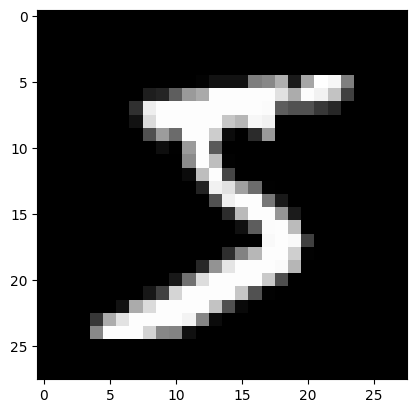

In [12]:
# Your Code Here:
plt.imshow(X_train[0], cmap='gray')


# Visualize More images
Using matplotlib, we can plot some sample images from the training set directly into this Jupyter Notebook.

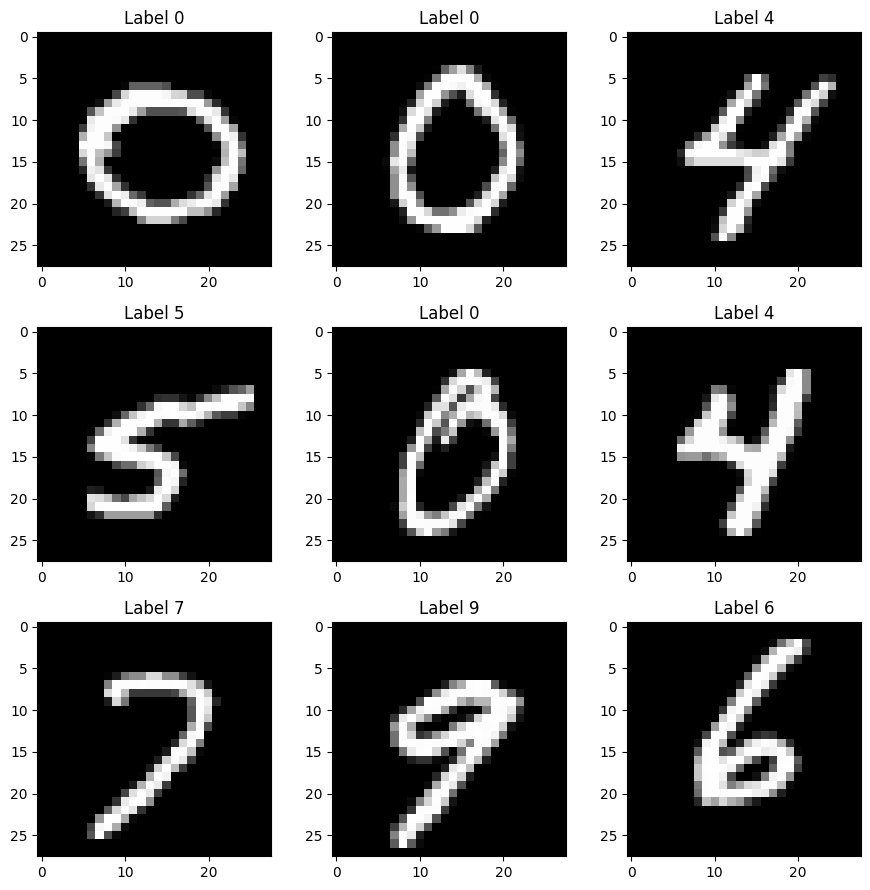

In [26]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray')
    plt.title("Label {}".format(y_train[num]))

plt.tight_layout()

What does the data really look like? Let's examine a single digit a little closer, and print out the array representing the pixel values.

In [27]:
# Define a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

In [28]:
# Let's look at the pixel values for training sample at say index 7
matprint(X_train[7])

0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0   38   43  105  255  253  253  253  253  253  174    6   0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0   43  139  224  226  252  253  252  252  252  252  252  252  158  14  0  0  0  0  0  
0  0  0  0  0    0    0    0    0  178  252  252  252  252  253  252  252  252  252  252  252  252  59  0  0  0  0  0  
0  0  0  0  0    0    0    0    0  109  

Each pixel is an 8-bit integer from 0-255. 0 is full black, while 255 is full white. This what we call a single-channel pixel. It's called monochrome.

*Fun-fact! Your computer screen has three channels for each pixel: red, green, blue. Each of these channels usually takes an 8-bit integer. 3 channels -- 24 bits total -- 16,777,216 possible colors!*

# Formatting the input data layer

Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector.

Each image needs to be then reshaped (or flattened) into a vector.

<img src='https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/flatten.png?raw=1' >

In [ ]:
X_train = X_train.flatten(start_dim=1)  # reshapes to [60000, 784]
X_test = X_test.flatten(start_dim=1)    # reshapes to [10000, 784]

print("Training matrix shape:", X_train.shape)
print("Testing matrix shape:", X_test.shape)

# Normalization
We'll also normalize the inputs to be in the range [0-1] rather than [0-255]. Normalizing inputs is generally recommended, so that any additional dimensions (for other network architectures) are of the same scale. E.g that the network’s learning regards all input features to a similar extent.

(Yes, pytorch had originally normalized the datasets, but we looked at them in native 0-255 for illustrative purposes.)

# Question 4: Normalize all values in the X tensors to be between 0.0 and 1.0

We need to normalize each value for each pixel for the entire vector for each input. Normalization is important to balance inputs, reducing the imact of the differences in the scale of the features. This also improves training convergence by keeping the weights and activations within a reasonable range.

You will not need any loops.

Remember, all the values currently are between 0.0 and 255.0

Hint: Review the intro to numpy at the top of this notebook

In [16]:
# Set your Answers to these variables.
X_train_norm = X_train/255
X_test_norm = X_test/255

In [ ]:
#Your Code Here


In [17]:
# Test: This will print nothing if your normalization is correct.
assert X_train_norm.sum() == 6146269.
assert X_test_norm.sum() == 1038914.5625

# Building a 3-layer fully connected network

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/figure.png?raw=1" />

# Define the first hidden layer

In [19]:
# The first hidden layer is a Linear layer, a set of 512 nodes ("artificial neurons").
# Each node will receive an element from each input vector and apply some weight and bias to it.

# So, the layer takes as input a vector of length 784, and outputs a vector of length 512, one for each node.
layer1 = Linear(784, 512) #brings in 784 pixels and 512 nodes are given out

# Question 6: Where did the number 784 come from?

Write answer here: the dimensions cuz 28x28 pixels



# Activation

In [20]:
# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.

activation1 = ReLU()

$$f(x) = max (0,x)$$





<img src = 'https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/relu.jpg?raw=1' >

In [21]:
# Dropout zeroes a selection of random outputs during training (i.e., disables their activation)
# Dropout helps protect the model from memorizing or "overfitting" the training data.
# Don't worry about it for now.

dropout1 = Dropout(0.2)

# Defining the second hidden layer

In [22]:
# The second hidden layer appears identical to our first layer.
# However, instead of each of the 512-node receiving 784-inputs from the input image data,
# they receive 512 inputs from the output of the first 512-node layer.

layer2 = Linear(512, 512) #512 neurons
activation2 = ReLU()

dropout2 = Dropout(0.2)

# Question 7: Defining the Final Output Layer

1. The output size of the final layer of a fully-connected-network should be equal to the number of desired labels (10 in this case). So, the final layer should have 10 neurons fully-connected to the previous 512-node layer.



2. Then, define a softmax activation.
The "softmax" activation represents a probability distribution over K different possible outcomes.
Its values are all non-negative and sum to 1.
https://en.wikipedia.org/wiki/Softmax_function

For example, if the final output form the last layer is:
```
[0, 0.94, 0, 0, 0, 0, 0.06, 0, 0]
```
then the model is predicting the most probable image is the digit `1`.


Hint: Softmax is a built-in activation. Look at these docs:
https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html

If you explicitly specify a dim, use dim=0 to specify the feature dimension since we removed the batch dim while exploring the data.


In [23]:
# Use these variables.

layer3 = Linear(512,10)
activation3 = Softmax(dim=0) #based on distribution, pick most likely value

# Assemble the model

In [24]:
# Define the complete model

model = Sequential(
    layer1,
    activation1,
    dropout1,
    layer2,
    activation2,
    dropout2,
    layer3,
    activation3
)

In [25]:
# Print the summary of the model
summary(model, input_size=(1, 784), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 512]         401,920
              ReLU-2               [-1, 1, 512]               0
           Dropout-3               [-1, 1, 512]               0
            Linear-4               [-1, 1, 512]         262,656
              ReLU-5               [-1, 1, 512]               0
           Dropout-6               [-1, 1, 512]               0
            Linear-7                [-1, 1, 10]           5,130
           Softmax-8                [-1, 1, 10]               0
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 2.55
Estimated Total Size (MB): 2.58
----------------------------------------------------------------


Read the model summary and verify your model has 669,706 trainable parameters.

# Bonus Question: Why does the model have 669,706 trainable parameters?
Whats the formula for FCN layer parameters?
Can you compute and verify the number of params for each layer on your own? Do they sum to 669,706?


In [ ]:
# Your Code Here

#layer params = input shape * output shape * bias params which are the same as output shape


# Lab section complete!

If you are done early, feel free to explore the following interactive ML blogs:

https://openai.com/index/clip

You should be able to understand the references to MNIST in the blog, however the references to CNNs will make sense after part 2 of the lab.



# Gradient Descent; How Neural Networks Learn
[3Blue1Brown: Gradient descent, how neural networks learn](https://youtu.be/IHZwWFHWa-w?t=109)

Watch from 1:49 - 16:38

[![But what is a neural network?](https://img.youtube.com/vi/aircAruvnKk/0.jpg)](https://www.youtube.com/watch?v=IHZwWFHWa-w&t=109s&ab_channel=3Blue1Brown "But what is a neural network?")

# **Lab Section 2**

# Compiling the model

Pytorch allow you to define a *computation graph*, which then compiles and runs efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiling a model, PyTorch asks you to specify your **criterion (loss function)** and your **optimizer**.

# Loss Function
The loss function we'll use here is called *categorical cross-entropy*, and is a loss function well-suited to comparing two probability distributions.

Our predictions are probability distributions across the ten different digits (e.g. "we're 70% confident this image is a 3, 20% sure it's an 8, 10% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. [More detail at Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy)


<img src = "https://miro.medium.com/max/919/1*ETtY7KCrzAlOmLeyDWE4Xg.png" >



# Optimizer
The optimizer helps determine how quickly the model learns through **gradient descent**. The rate at which descends a gradient is called the **learning rate**.

<img src = "https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/gradient_descent.png?raw=1" >
<img src = 'https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/learning_rate.png?raw=1' >


So are smaller learning rates better? Not quite! It's important for an optimizer not to get stuck in local minima while neglecting the global minimum of the loss function. Sometimes that means trying a larger learning rate to jump out of a local minimum.

<img src = 'https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/complicated_loss_function.png?raw=1' >


# Compile the model

In [29]:
# Let's use the Adam optimizer for learning
# Adam (Adaptive Moment Estimation) is an optimizer that leverages momentum, as well as a few other tricks.
# Imagine a ball rolling down the high dimension hills, but keeping momentum to jump over the small bumps!

# Define the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()


# Train the model!
This is the fun part!

The batch size determines over how much data per step is used to compute the loss function, gradients, and back propagation. Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.

Too large of a batch size smoothes the local minima of the loss function, causing the optimizer to settle in one because it thinks it found the global minimum.

Too small of a batch size creates a very noisy loss function, and the optimizer may never find the global minimum.

So a good batch size may take some trial and error to find!


Epochs represent the number of times the model will see the entire dataset. So 5 epochs means 5 passes on the entire training dataset.

This make take a few minutes to run, watch the bottom of this cell as it prints metrics for each epoch.


In [38]:
# These hardcoded paramteters such as batch size and epoch are what are called hyperparamters. These are adjusted by the developer.
batch_size = 90
epochs = 7

# Training loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    # Initialize some variables to collect metrics
    running_loss = 0.0
    correct = 0
    total = 0

    # Shuffle the data
    train_size = X_train_norm.size(0)
    permutation = torch.randperm(train_size)

    for i in range(0, train_size, batch_size):
        indices = permutation[i : i + batch_size]
        batch_x, batch_y = X_train_norm[indices], y_train[indices]

        batch_x = batch_x.view(batch_x.size(0), -1) # New line of code

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_x)

        # Compute the loss
        loss = criterion(outputs, batch_y)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Collect Metrics
        running_loss += loss.item()
        predicted = torch.max(outputs, 1).indices
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

    # Print epoch statistics
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(trainloader):.4f}, Accuracy: {100 * correct/total:.2f}%')

Epoch [1/7], Loss: 1470.1544, Accuracy: 91.83%
Epoch [2/7], Loss: 1470.0971, Accuracy: 92.66%
Epoch [3/7], Loss: 1469.9722, Accuracy: 93.50%
Epoch [4/7], Loss: 1469.8564, Accuracy: 94.24%
Epoch [5/7], Loss: 1469.8734, Accuracy: 94.36%
Epoch [6/7], Loss: 1469.8085, Accuracy: 94.87%
Epoch [7/7], Loss: 1469.7682, Accuracy: 95.10%


The two numbers, loss and accuracy, represent the value of the loss function of the network on the training set, and the overall accuracy of the network on the **training** data. But let's examine how it performs on data it did not train on!



# Evaluate Model's Accuracy on Test Data

In [39]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    X_test_norm = X_test_norm.view(X_test_norm.size(0), -1) # New line of code

    outputs = model(X_test_norm)
    predicted = torch.max(outputs, 1).indices
    accuracy = (predicted == y_test).sum().item() / len(y_test)
    print(f'Accuracy of the model on the 10000 test images: {100 * accuracy:.2f}%')
    incorrect_count = (predicted != y_test).sum().item()
    print(f'Number of incorrect predictions: {incorrect_count}')

Accuracy of the model on the 10000 test images: 95.24%
Number of incorrect predictions: 476


# Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sensible. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [35]:
# Check which items we got right / wrong

correct_indices = (predicted == y_test).nonzero(as_tuple=True)[0]
incorrect_indices = (predicted != y_test).nonzero(as_tuple=True)[0]

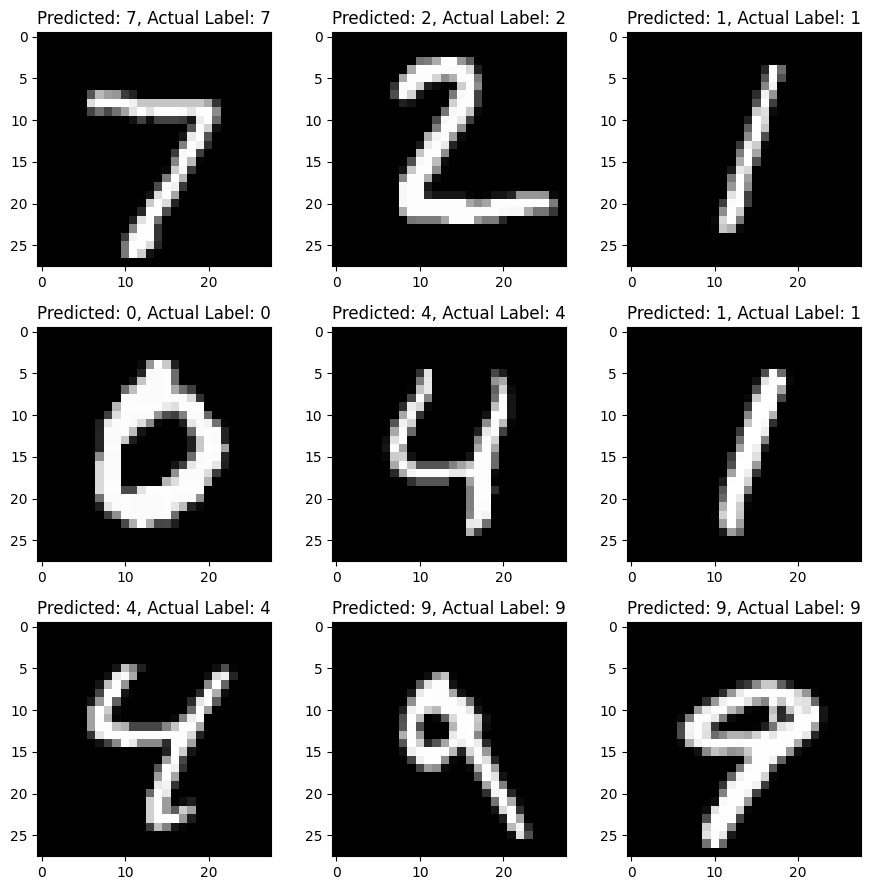

In [36]:
# Test Samples that our model predicted correctly

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test_norm[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}, Actual Label: {}".format(predicted[correct], y_test[correct]))

plt.tight_layout()


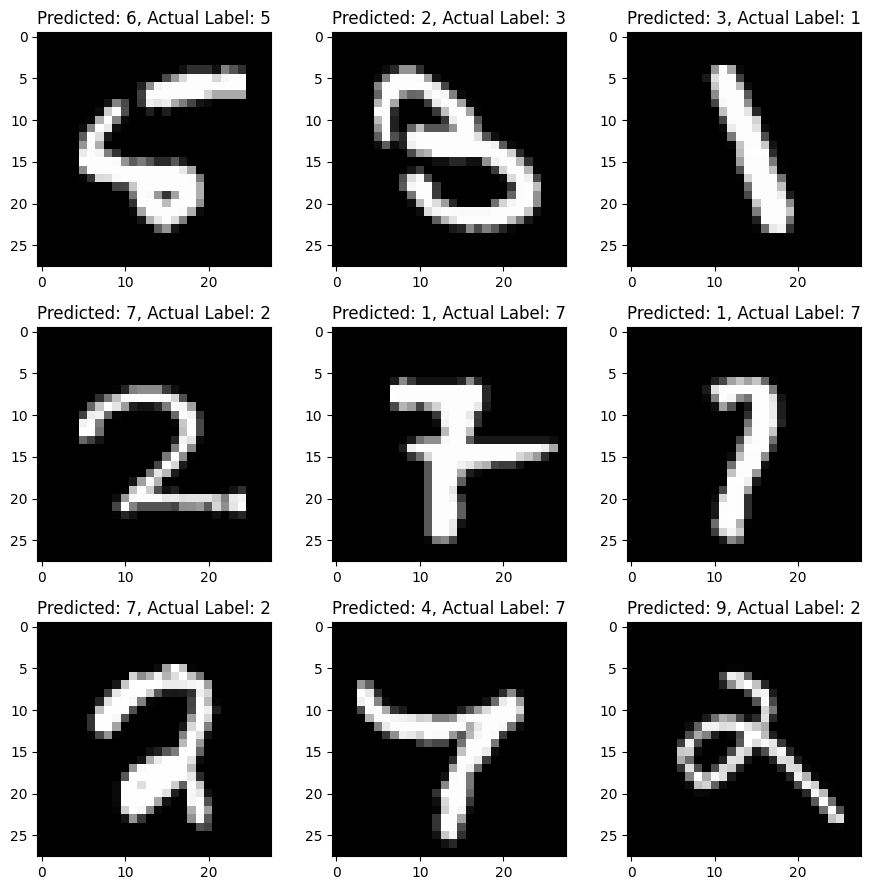

In [37]:
# Test Samples that our model predicted incorrectly

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test_norm[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}, Actual Label: {}".format(predicted[incorrect], y_test[incorrect]))

plt.tight_layout()

# Question 8: What do you notice about the sample that the network got wrong? Any difference between the samples that the model predicted correctly vs incorrectly?


Write your answer here:


# Question 9: Time for a comptetition! Adjust your model architecture and configuration to try to achieve a better performance. This is called hyperparameter tuning.

Try adjusting any of the following:

* adding more layers
* adjusting the number of neurons in your hidden layers
* using different activation functions
* removing dropout
* increasing or decreasing the batch size
* changing the number of epochs
* change your learning rate
* use a different optimizer


Let's see who can make the best model! Winner gets bragging rights

Remember, to re run cells including model definition compilation if you change hyperparameters

# Lab Section Complete
If you finished early, try to improve your model. Remember if you change something about the network, you need to re-run all the cells that define and compile the network.

# Introducing Convolutional Neural Networks!

What are Convolutions?


Previously, we built a network that accepts the normalized pixel values of each value and operates solely on those values. What if we could instead feed different features (e.g. **curvature, edges**) of each image into a network, and have the network learn which features are important for classifying an image?

This is possible through convolution! Convolution applies **kernels** (filters) that traverse through each image and generate **feature maps**.


<img src = 'https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif' >

<img src = 'https://i.stack.imgur.com/9OZKF.gif' >

In the above example, the kernel is a 3 x 3 matrix that is being slidded over the input image the image matrix. A dot product operation takes place between the image and the kernel and the convolved feature is generated.

Kernels are often used in photoediting software to apply blurring, edge detection, sharpening, etc.

<img src = 'https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/kernels.png?raw=1' >



Kernels in deep learning networks are used in similar ways, i.e. highlighting some feature. Combined with a system called **max pooling**, the non-highlighted elements are discarded from each feature map, leaving only the features of interest, reducing the number of learned parameters, and decreasing the computational cost (e.g. system memory).

<img src = 'https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/max_pooling.png?raw=1' >

Each kernel in a CNN learns a different characteristic of an image.

We can also take convolutions of convolutions -- we can stack as many convolutions as we want, as long as there are enough pixels to fit a kernel.

*Warning: What you may find down there in those deep convolutions may not appear recognizable to you.*

<img src = 'https://www.kernix.com/doc/classification-cnn@2x-1.jpg' >


The kernels are not operating on each feature map independently, but rather are multidimensional kernals that operate on all the feature maps.

<img src = 'https://i.stack.imgur.com/2ezvr.gif' >


<img src = 'https://media.fs.com/images/community/erp/iNs3p_2KZeGD.png' >


**At the top of the notebook, click Runtime -> Change runtime type -> Select the bubble under Hardware Accelerator to T4 GPU -> Save**


In [ ]:
# Check if GPU is connected
# If this prints "cuda", pytorch is connected to a GPU.
# CUDA is the NVIDIA software layer that provides access to NVIDA GPUs.
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Question 10: Building a Convolutional Neural Network
Note, our network will not be very deep. Modern networks can have 10 to 100+ layers each of which are far more complex.

In [40]:
# After changing runtime, the notebook may restart. So, we need to re-import libraries.

import torch
from torchvision import datasets, transforms
from torch.nn import Sequential, Conv2d, MaxPool2d, Flatten, Linear, Dropout, ReLU, BatchNorm2d
from torchsummary import summary

Let's define our network in the more common pytorch style format, as a subclass of `torch.nn.Module`.

**Question 10: Fill in the conv_layer2 for this class**

In [41]:
# Define the CNN model
class SimpleCNN(torch.nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_layer1 = Sequential(
            Conv2d(1, 32, kernel_size=3, stride=1, padding=1),  # output: (32, 28, 28)
            ReLU(),
            MaxPool2d(kernel_size=2, stride=2),  # output: (32, 14, 14)
        )
        self.conv_layer2 = Sequential(
            Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # output: (64, 14, 14)
            ReLU(),
            MaxPool2d(kernel_size=2, stride=2),  # output: (64, 7, 7)
        )

        self.conv_layer3 = Sequential(
            Conv2d(64, 128, kernel_size=3, stride=1, padding=1),  # output: (128, 7, 7)
            ReLU(),
            MaxPool2d(kernel_size=2, stride=2)  # output: (128, 3, 3)
        )

        self.fc_block = Sequential(
            Flatten(),  # output: (128*3*3 -> 1152)
            Linear(128*3*3, 256),
            ReLU(),
            Dropout(0.5),
            Linear(256, 10)
        )

    def forward(self, x):
        x = self.conv_layer1(x)
        x = self.conv_layer2(x)
        x = self.conv_layer3(x)
        x = self.fc_block(x)
        return x

# Data Augmentation

Data augmentation prevents overfitting by slightly modifying the input data randomly. It's a way to increase the size of our dataset for "free". Importantly, the data augmentation must retain the information that defines the class. Too much augmentation could make the training samples corrupted.

Each epoch, it will modify the input data in a different way.




<img src = 'https://miro.medium.com/max/1330/1*MUOrB2-H5qkJop3Kl2oYmQ.png' >

In [42]:
# These data augmentation transform parameters are also hyperparameters.
train_transform = transforms.Compose([
    transforms.RandomRotation(degrees=5),         # slight rotation
    transforms.RandomAffine(degrees=0, shear=5),  # slight shear
    transforms.ToTensor()
])

test_transform = transforms.ToTensor()

Now, let's reload the data while applying our data augmentation transforms. Notice that since we are no longer exploring the data by loading the entire dataset. Rather, we will train and test directly from the train/test loaders in batches. This would allow for training from datasets that are too large to fit in memory.

In [43]:
# Reload the MNIST data

# Download, load, and transform the training data
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True)

# Download and load the test data
testset = datasets.MNIST(root='./data', train=False, download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=False)


# Question 11: Define ConvNet Model

Define your criterion (loss function) and optimizer.
Again, use cross entropy and Adam

In [ ]:
# Instantiate the model, define the loss function and the optimizer
model = SimpleCNN().to(device)
criterion = None
optimizer = None

In [ ]:
# Your Code Here

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Print the model summary
summary(model, input_size=(1, 28, 28))

**Notice that the model has FEWER trainable parameters than before! It's more complex, but overall smaller!** This is becuase of parameter sharing: each kernal is applied to the whole input, it's re-used rather than only trained on a specific part of the input image

# Training Loop
If not using a GPU, this will run slowly.

In [ ]:
# Training the model
NUM_EPOCHS = 5

for epoch in range(NUM_EPOCHS):
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Record Metrics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_accuracy:.2f}%')


# Evaluate our model

In [ ]:
# Evaluating the model on the test set
incorrect_images = []
incorrect_labels = []
correct_labels = []

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        incorrect = (predicted != labels)
        incorrect_images.extend(images[incorrect])
        incorrect_labels.extend(predicted[incorrect])
        correct_labels.extend(labels[incorrect])

    print(f'Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%')
    print(f'Number of incorrect predictions: {total - correct}')

Go check the number of incorrect predictions from the fully connected network. Now, we have far fewer incorrect predictions!

# Great results!

But wouldn't it be nice if we could visualize those convolutions so that we can see what the model is seeing?

 Visit https://adamharley.com/nn_vis/cnn/2d.html


 For a 3D visualization of a very similar network

# Examine incorrect predictions
Again, let's look at a few that the model did not get correct.
Many would be hard to discern even for a human! This is why achieving 100% accuracy is not possible.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
for i, incorrect in enumerate(incorrect_images[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(incorrect.cpu().reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred: {}, Label: {}".format(incorrect_labels[i], correct_labels[i]))

plt.tight_layout()

# Competition Round 2!

Perform hyperparameter tuning to try to achieve a better performance.


Experiment with adding layers, adjusting the number of kernels (output channels), kernel size, change pooling, change number of nodes in your hidden layer(s), removing dropout, increasing or decreasing the batch size, changing the number of epochs, change your learning rate, etc..


Again, Winner gets bragging rights!


```
Some Resources used for this notebook:
https://developers.google.com/machine-learning/crash-course/framing/ml-terminology

[Daniel Moser (UT Southwestern Medical Center)](https://colab.research.google.com/github/AviatorMoser/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb),
[Xavier Snelgrove](https://github.com/wxs/keras-mnist-tutorial),**bold text**
[Yash Katariya](https://github.com/yashk2810/MNIST-Keras)
```



[A great followup to this workshop is this video by Welch Labs, learn about the  historical advancements in Convolitional Neural Networks!](https://www.youtube.com/watch?v=UZDiGooFs54&ab_channel=WelchLabs)

[Continue the 3Blue1Brown series to learn about Large Language Models and GPTs](https://www.youtube.com/watch?v=wjZofJX0v4M&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=6&ab_channel=3Blue1Brown)



[Watch this video for a technical deep dive on the seminal paper that launched the Large Language Model revolution](https://www.youtube.com/watch?v=iDulhoQ2pro&ab_channel=YannicKilcher)

[A general set of links to many ML projects and frameworks](https://machinelearningmastery.com/start-here/)
